In [1]:
import pandas as pd

df = pd.read_excel('C:\\Users\\E005347\\Documents\\ml work\\linear regression from scratch\\slr06.xls') #for an earlier version of Excel, you may need to use the file extension of 'xls'


In [2]:
print(df.head())

     X      Y
0  108  392.5
1   19   46.2
2   13   15.7
3  124  422.2
4   40  119.4


In [3]:
#calcute the mean of numbers
#mean(x) = sum(x) / count(x)
# Calculate the mean value of a list of numbers
def mean(values):
    return sum(values) / float(len(values))

In [4]:
#calculate the variance
#variance = sum( (x - mean(x))^2 )

# Calculate the variance of a list of numbers
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])

In [14]:
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x, mean_x), variance(y, mean_y)

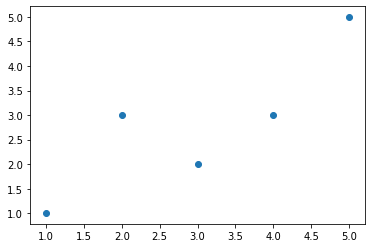

In [76]:
from matplotlib import pyplot
pyplot.scatter(x, y)
pyplot.show()

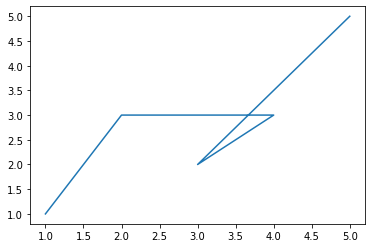

In [77]:
from matplotlib import pyplot
pyplot.plot(x, y)
pyplot.show()

In [15]:
var_x

10.0

In [16]:
var_y

8.8

In [6]:
print(x)

[1, 2, 4, 3, 5]


In [7]:
print(y)

[1, 3, 3, 2, 5]


In [9]:
mean_x, mean_y = mean(x), mean(y)


In [ ]:
print(mean_x)
print(mean_y)

In [10]:
mean([1,2,3,4])

2.5

In [11]:
var_x, var_y = variance(x, mean_x), variance(y, mean_y)


In [12]:
print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))

x stats: mean=3.000 variance=10.000
y stats: mean=2.800 variance=8.800


In [13]:
#formaula for calculating covariance
#covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))

def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar

In [17]:
# calculate covariance
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
x = [row[0] for row in dataset]
y = [row[1] for row in dataset]
mean_x, mean_y = mean(x), mean(y)
covar = covariance(x, mean_x, y, mean_y)
print('Covariance: %.3f' % (covar))

Covariance: 8.000


In [18]:
print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))

x stats: mean=3.000 variance=10.000
y stats: mean=2.800 variance=8.800


In [20]:
#estimating the co-efficients in a linear regression
#B1 = sum((x(i) - mean(x)) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 )
#B1 = covariance(x, y) / variance(x)
#B0 = mean(y) - B1 * mean(x)

def coefficients(dataset):
	x = [row[0] for row in dataset]
	y = [row[1] for row in dataset]
	x_mean, y_mean = mean(x), mean(y)
	b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b0 = y_mean - b1 * x_mean
	return [b0, b1]

In [22]:
# calculate coefficients
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
b0, b1 = coefficients(dataset)
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))

Coefficients: B0=0.400, B1=0.800


In [23]:
def simple_linear_regression(train, test):
	predictions = list()
	b0, b1 = coefficients(train)
	for row in test:
		yhat = b0 + b1 * row[0]
		predictions.append(yhat)
	return predictions

In [25]:
from math import sqrt

In [26]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

In [29]:
# Evaluate regression algorithm on training dataset
def evaluate_algorithm(dataset, algorithm):
	test_set = list()
	for row in dataset:
		row_copy = list(row)
		row_copy[-1] = None
		test_set.append(row_copy)
	predicted = algorithm(dataset, test_set)
	print(predicted)
	actual = [row[-1] for row in dataset]
	rmse = rmse_metric(actual, predicted)
	return rmse
 

In [30]:
# Test simple linear regression
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
rmse = evaluate_algorithm(dataset, simple_linear_regression)
print('RMSE: %.3f' % (rmse))

[1.1999999999999995, 1.9999999999999996, 3.5999999999999996, 2.8, 4.3999999999999995]
RMSE: 0.693


In [32]:
#predicting insurance

from random import seed
from random import randrange
from csv import reader
from math import sqrt

In [33]:
# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset
 

In [50]:
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

In [35]:
# Split a dataset into a train and test set
def train_test_split(dataset, split):
	train = list()
	train_size = split * len(dataset)
	dataset_copy = list(dataset)
	while len(train) < train_size:
		index = randrange(len(dataset_copy))
		train.append(dataset_copy.pop(index))
	return train, dataset_copy
 

In [36]:
# Calculate root mean squared error
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)

In [37]:
# Evaluate an algorithm using a train/test split
def evaluate_algorithm(dataset, algorithm, split, *args):
	train, test = train_test_split(dataset, split)
	test_set = list()
	for row in test:
		row_copy = list(row)
		row_copy[-1] = None
		test_set.append(row_copy)
	predicted = algorithm(train, test_set, *args)
	actual = [row[-1] for row in test]
	rmse = rmse_metric(actual, predicted)
	return rmse

In [38]:
# Calculate the mean value of a list of numbers
def mean(values):
	return sum(values) / float(len(values))
 
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
	covar = 0.0
	for i in range(len(x)):
		covar += (x[i] - mean_x) * (y[i] - mean_y)
	return covar
 
# Calculate the variance of a list of numbers
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])
 
# Calculate coefficients
def coefficients(dataset):
	x = [row[0] for row in dataset]
	y = [row[1] for row in dataset]
	x_mean, y_mean = mean(x), mean(y)
	b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
	b0 = y_mean - b1 * x_mean
	return [b0, b1]

In [40]:
# Simple linear regression algorithm
def simple_linear_regression(train, test):
	predictions = list()
	b0, b1 = coefficients(train)
	for row in test:
		yhat = b0 + b1 * row[0]
		predictions.append(yhat)
	return predictions
 


In [41]:
import os
os.chdir('C:\\Users\\E005347\\Documents\\ml work\\linear regression from scratch')

In [51]:
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

In [73]:
# Simple linear regression on insurance dataset
seed(1)
# load and prepare data
filename = 'insurance_old.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
	str_column_to_float(dataset, i)
# evaluate algorithm
split = 0.6
rmse = evaluate_algorithm(dataset, simple_linear_regression, split)
print('RMSE: %.3f' % (rmse))


RMSE: 33.630


In [64]:
len(dataset[0])
    

2

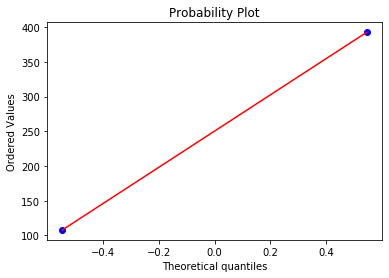

In [80]:
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(dataset[0], dist="norm", plot=plt)
plt.show()

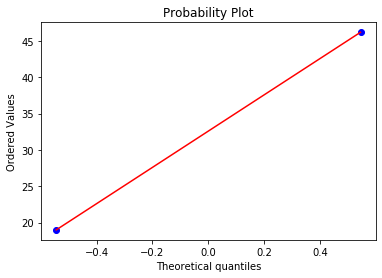

In [81]:
import scipy.stats as stats
import matplotlib.pyplot as plt
stats.probplot(dataset[1], dist="norm", plot=plt)
plt.show()